![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


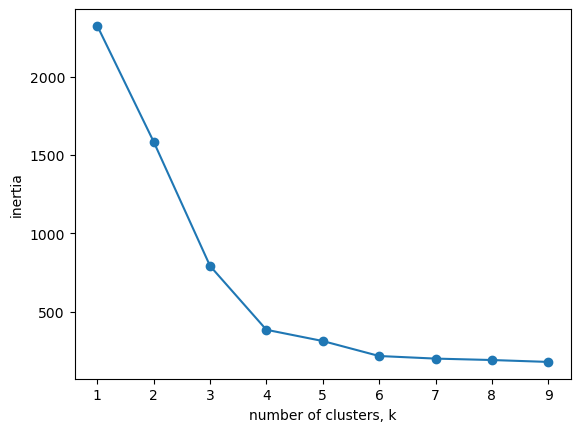

In [40]:
# let's convert sex to numeric
df = pd.get_dummies(penguins_df, drop_first=True, dtype='int')
scaler = StandardScaler()
samples = scaler.fit_transform(df)

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

    df
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [52]:
# Looking at PCA, are there 4 or 6 clusters?
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
pca = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = pca.fit_transform(samples)

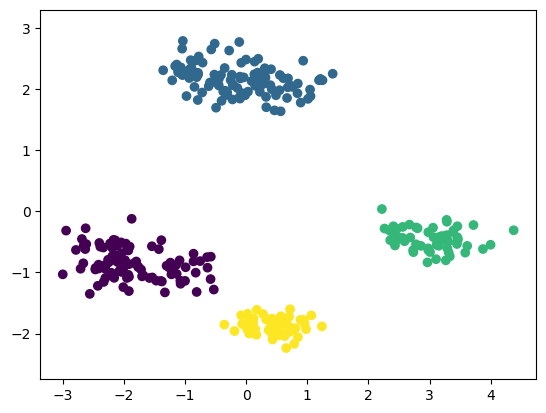

In [53]:
# add labels for 4 and 6 clusters
k=4
model_test = KMeans(n_clusters=k)
    
# Fit model to samples
model_test.fit(samples)

l = model_test.predict(samples)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys, c=l)
plt.axis('equal')
plt.show()

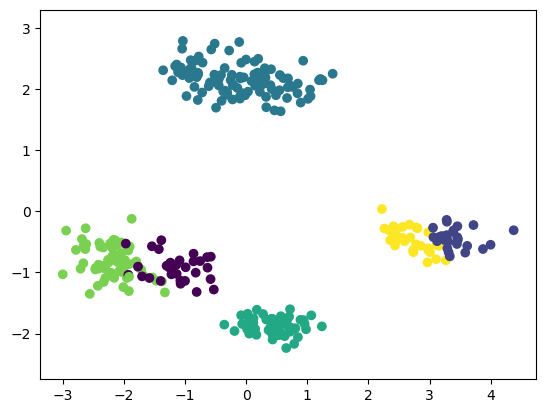

In [61]:
# add labels for 4 and 6 clusters
k=6
model_test = KMeans(n_clusters=k)
    
# Fit model to samples
model_test.fit(samples)

l = model_test.predict(samples)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys, c=l)
plt.axis('equal')
plt.show()

In [62]:
# Both the Knee method and PCA point towards 4 clusters
# Lets model k=6
k=4
model = KMeans(n_clusters=k)
    
# Fit model to samples
model.fit(samples)

df['label'] = model.predict(samples)

stat_penguins = df.groupby('label').mean().reset_index()

stat_penguins.sort_values('culmen_length_mm')

,label,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,0,40.217757,17.611215,189.046729,3419.158879,1.0,0.0
1,1,43.878302,19.111321,194.764151,4006.603774,0.0,1.0
2,2,45.563793,14.237931,212.706897,4679.741379,1.0,0.0
3,3,49.473770,15.718033,221.540984,5484.836066,0.0,1.0
